In [23]:
import tweepy
from tweepy import OAuthHandler
import json
from tweepy import Stream
from tweepy.streaming import StreamListener
import sys
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer
import re
from os import path
from scipy.misc import imread
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS
import csv

In [24]:
consumer_key='W3JjGNNESZ2vp3jiiVD80c73A'
consumer_secret='iWFWQN4eGaJhugXvKonxPIGQHJVIKY5UOIrp55LDUw5LSigVUe'
access_token='700536412-p7ol7tUmvlQinvlXOMfRkBll3AM9PM9dd9Z1nbKo'
access_token_secret='VmUXPnO944k1Oijt9oiMhJsBbMCOWGwbgCRTNrn9L1dp0'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

tweet_get=input("Enter the hashtag with your topic: ")
tweet_num=int(input("Enter the number of tweets you want to get(must be less or equal to 30):"))

if '#' not in tweet_get:
    tweet_get="#" + tweet_get

for tweet in tweepy.Cursor(api.search,q=tweet_get,
                         lang="en").items(tweet_num):
    with open('raw_tweet.txt','a')as file:
        file.write(tweet.text+'\n')
    print(tweet.created_at,tweet.text)


Enter the hashtag with your topic: centralpark
Enter the number of tweets you want to get(must be less or equal to 30):30
2018-11-06 22:30:06 RT @themandarinduc1: Ever since I landed in #CentralPark all these hoes got they feathers in a ruffle 🤤😍😘😘 #mandarinduck https://t.co/YytbE…
2018-11-06 22:26:13 @ava No, thank YOU queen and congratulations on #CentralPark wrapping! We need this show and I can’t wait to watch!
2018-11-06 22:24:02 RT @steviegolding_: #CentralPark  beautiful October day. https://t.co/Rbg7BCsJCs
2018-11-06 22:21:09 RT @rtanphoto: Gapstow Bridge in Fall colors 🍁 #CentralPark #NewYorkCity #nyc #fallfoliage #autumn #fall #nycgo @nycfeelings @ThePhotoHour…
2018-11-06 22:16:18 Dear Fall, I think I’m falling for you..🍁
@CentralParkNYC #fallinnyc #autumn #centralpark #fall IG: mrhodus1 https://t.co/WvzZVXky8B
2018-11-06 22:15:18 RT @malemalefica: Bow Bridge #CentralPark #NewYork https://t.co/hCrkXgNFSI
2018-11-06 22:07:48 Like a carpet of fuzzy fall colors, always gorgeous 

In [56]:
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize,word_tokenize
from nltk.tokenize import RegexpTokenizer
import re
import nltk
import json

tweet_data=open('../503/raw_tweet.txt').read()
tweet_data_clean=re.sub(r"https\S+","",tweet_data)
stop_words = nltk.corpus.stopwords.words('english')
newstopwords=['RT','I','We','A','An']
stop_words.extend(newstopwords)
#stop_words.append('I','We','RT')
tokenizer=RegexpTokenizer(r'\w+')
BagOfWords=tokenizer.tokenize(tweet_data_clean)
#BagOfWords=word_tokenize(tweet_data)
WordsFiltered=[]
#print(len(stopWords))
#print(stopWords)

for w in BagOfWords:
    if w not in stop_words:
        WordsFiltered.append(w)
#print(WordsFiltered)
fdist1=FreqDist(WordsFiltered)

with open('relevant-word-frequency.csv','w')as f:
        f.write(json.dumps(fdist1))


In [73]:
#type(WordsFiltered)
#print(WordsFiltered)
with open('Tableau-word.csv','w')as f:
    for s in WordsFiltered:
        f.write("%s\n" %s)

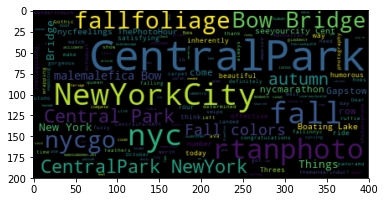

In [41]:
#Wordcloud
from wordcloud import WordCloud,STOPWORDS
StringOfWords=' '.join(WordsFiltered)
wordcloud=WordCloud().generate(StringOfWords)
import matplotlib.pyplot as plt
plt.imshow(wordcloud,interpolation='bilinear')
